#### 题目一、以鸢尾花数据集为例学习 SVM

1. 加载数据，划分鸢尾花数据集，训练集比例0.2，随机种子42

In [38]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
iris_data = datasets.load_iris()
x = iris_data.data
y = iris_data.target
x_train,x_test,y_train,y_test = train_test_split(x,y,train_size=0.2,random_state=42)

2. 创建并训练 SVM 模型，使用线性核函数，随机种子42（也可以自己调试、体验不同参数的作用，选择更好的值，注释明确即可）

In [39]:
from sklearn import svm
mode = svm.SVC(kernel="linear",random_state=42)
mode.fit(x_train,y_train)
predict = mode.predict(x_test)

3. 使用 Accuracy、Recall、F1 Score、Confusion Matri 这四个评估指标来评估实验效果

In [40]:
from sklearn.metrics import confusion_matrix,accuracy_score,f1_score,recall_score
cm = confusion_matrix(y_test,predict)
acc = accuracy_score(y_test,predict)
f1s = f1_score(y_test,predict,average='macro')
rs = recall_score(y_test,predict,average='macro')
print("Accuracy:{}".format(acc))
print("f1_score:{}".format(f1s))
print("recall_score:{}".format(rs))
print("confusion_matrix:\n",cm)

Accuracy:0.975
f1_score:0.9740084388185654
recall_score:0.9743589743589745
confusion_matrix:
 [[43  0  0]
 [ 0 36  3]
 [ 0  0 38]]


#### 题目二、以新闻数据分类为例 学习朴素贝叶斯

1. 导入库与数据集，数据集的导入方式：from sklearn.datasets import fetch_20newsgroups

In [41]:
from sklearn import naive_bayes
from sklearn.datasets import fetch_20newsgroups
data = fetch_20newsgroups(subset='all')

2. 查看类别标签、数据集的描述、数据样本

In [42]:
print("类别标签：")
data.target_names

类别标签：


['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']

下面这两个，如果打印出来会很长，故不打印

In [43]:
##print("数据集描述：")
##print(data.DESCR)

In [44]:
##print("数据样本：")
##data.data

3. 将文本数据转换为词袋模型

In [45]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(stop_words='english')
X = vectorizer.fit_transform(data.data)

4. 将数据集分为训练集和测试集，训练集比例0.2，随机种子42

In [46]:
Y = data.target
x_train,x_test,y_train,y_test = train_test_split(X,Y,train_size=0.2,random_state=42)

5. 创建并训练朴素贝叶斯分类器

In [47]:
mode = naive_bayes.MultinomialNB()
mode.fit(x_train,y_train)

MultinomialNB()

6. 使用 Accuracy、Recall、F1 Score 这三个评估指标来评估实验效果

In [48]:
predict = mode.predict(x_test)
acc = accuracy_score(y_test,predict)
f1s = f1_score(y_test,predict,average='macro')
rs = recall_score(y_test,predict,average='macro')
print("Accuracy:{}".format(acc))
print("f1_score:{}".format(f1s))
print("recall_score:{}".format(rs))

Accuracy:0.7972408304039265
f1_score:0.7807717727880614
recall_score:0.7877309652358778


7. 横坐标为 Predicted，纵坐标为 Actual，画出混淆矩阵Confusion Matrix

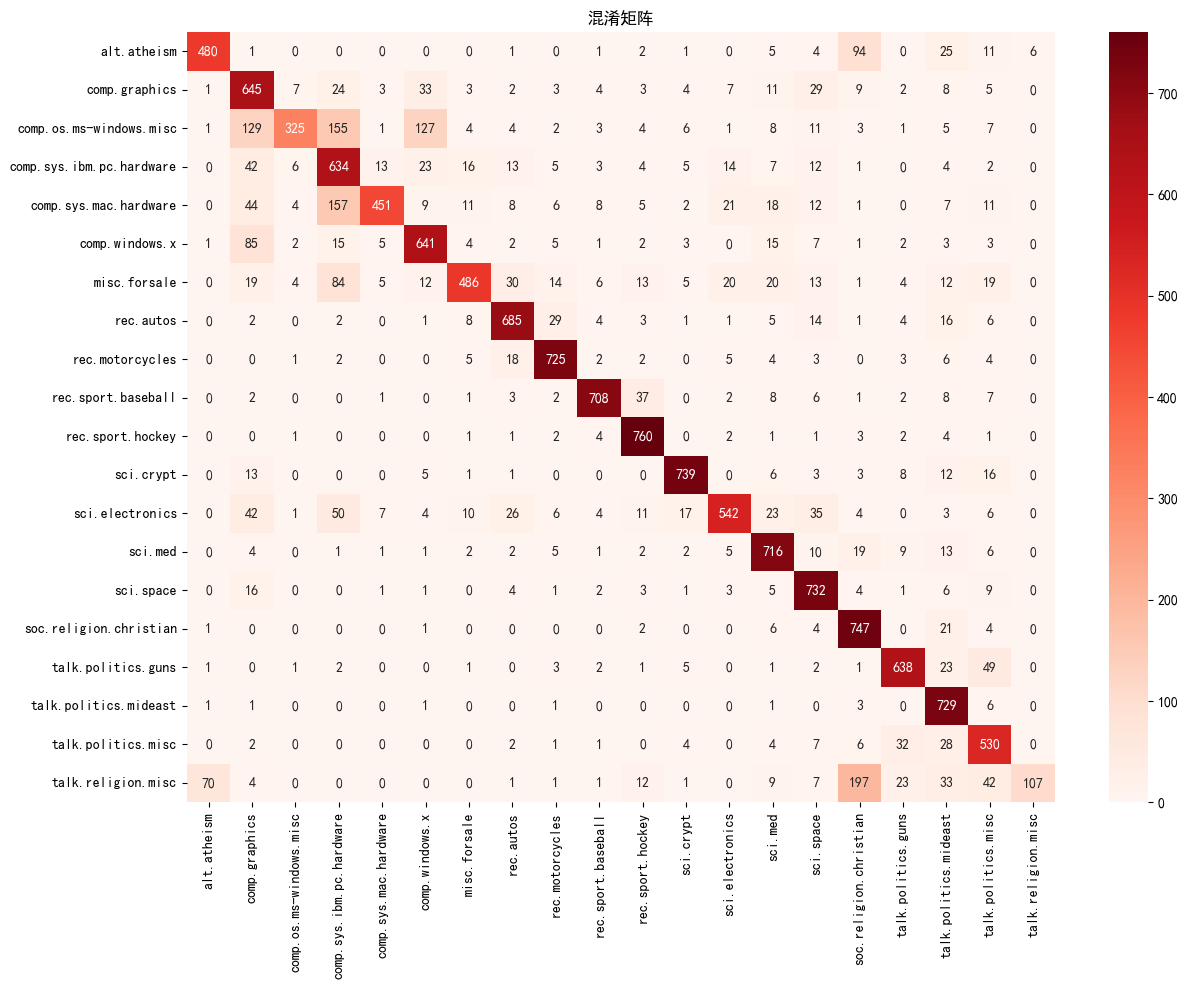

In [49]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif'] = 'SimHei'
plt.rcParams['axes.unicode_minus']=False
cm = confusion_matrix(y_test,predict)
plt.figure(figsize=(14,10))
sns.heatmap(cm,annot=True,fmt='d',cmap='Reds',xticklabels=data.target_names, yticklabels=data.target_names)
plt.title("混淆矩阵")
plt.show()

#### 题目三、以鸢尾花数据集为例 学习k-means聚类

1. 导入数据集和聚类库

In [50]:
from sklearn.cluster import KMeans
X = iris_data.data
Y = iris_data.target

2. 使用k-means聚类，将数据分为3个簇，设置随机种子为0

In [51]:
mode = KMeans(3,random_state=0)
mode.fit(X)

KMeans(n_clusters=3, random_state=0)

3. PCA 降维到2维空间后，输出可视化结果

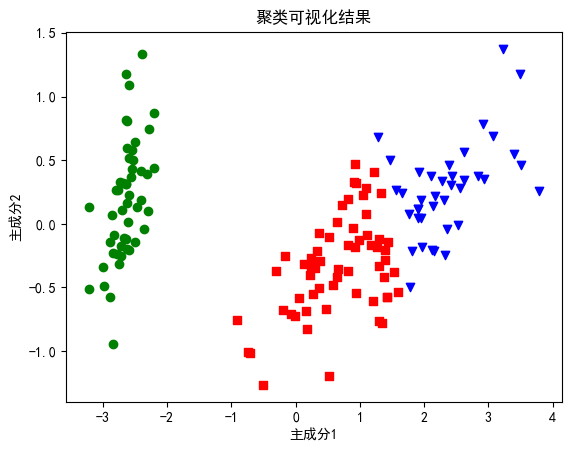

In [52]:
import matplotlib.pyplot as plt 
from sklearn import decomposition

pca = decomposition.PCA(n_components=2)
pca.fit(X)
new_x = pca.transform(X)
predict_x = mode.predict(X)

color = ['r','g','b']
markers = ['s','o','v']

for i in range(len(predict_x)):
    tmp = predict_x[i]
    plt.scatter(new_x[i][0],new_x[i][1],marker=markers[tmp],c=color[tmp])
plt.title("聚类可视化结果")
plt.xlabel("主成分1")
plt.ylabel("主成分2")
plt.show()

4. 尝试先降维，再聚类，再输出可视化结果，比较两次的不同

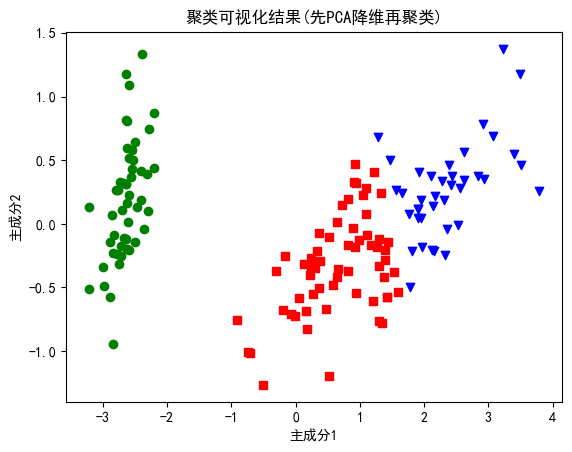

In [53]:
#new_x是已经降维后的数据
mode.fit(new_x)
predict_x1=mode.predict(new_x)

color = ['r','g','b']
markers = ['s','o','v']

for i in range(len(predict_x1)):
    tmp = predict_x1[i]
    plt.scatter(new_x[i][0],new_x[i][1],marker=markers[tmp],c=color[tmp])
plt.title("聚类可视化结果(先PCA降维再聚类)")
plt.xlabel("主成分1")
plt.ylabel("主成分2")
plt.show()

这里发现聚类后再PCA降维和PCA降维后再聚类结果是一样的

5. 使用轮廓系数比较聚类效果

In [54]:
from sklearn.metrics import silhouette_score

score = silhouette_score(X,predict_x)
score1 = silhouette_score(new_x,predict_x1)

print(score,score1)

0.551191604619592 0.5976764219547992


这里看到，虽然两种方法得到的聚类结果完全一样，但是先PCA降维后再聚类的轮廓线系数更接近1，所以这种聚类方法是会比较优一点的。

6. 绘制轮廓系数与聚类数的关系图

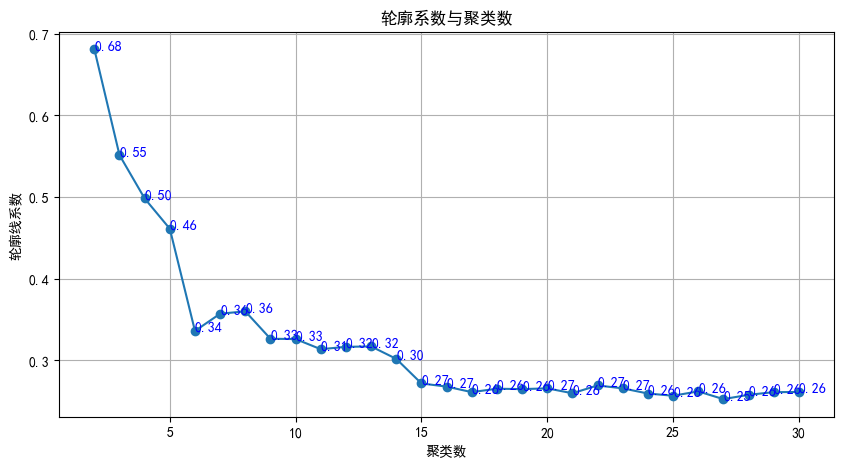

In [55]:
scores = list()
counts = [x for x in range(2,31)]

for x in counts:
    new_mode = KMeans(n_clusters=x,random_state=0)
    new_mode.fit(X)
    predict = new_mode.predict(X)
    scores.append(silhouette_score(X,predict))
plt.figure(figsize=(10,5))
plt.plot(counts,scores,marker='o')
for i in range(len(counts)):
    plt.text(counts[i],scores[i],"{:.2f}".format(scores[i]),color='b')
plt.title("轮廓系数与聚类数")
plt.ylabel("轮廓线系数")
plt.xlabel('聚类数')
plt.grid(True)
plt.show()

这里可以看到随着聚类数增加，轮廓线系数大致呈现下降趋势